In [2]:
from stochastic_volatility_models.src.models.rough_bergomi.rough_bergomi import RoughBergomi
from notebook_utils import Notebook

In [3]:
nb = Notebook(
	RoughBergomi(
		parameters={
			"hurst_index": 0.778517007065415,
			"wiener_correlation": -0.9193795156073621,
			"volatility_of_volatility": 3.1856091243775864,
		},
	),
)
# nb.spx_price()

In [8]:
nb.plot_surfaces()

T: 2022-03-09


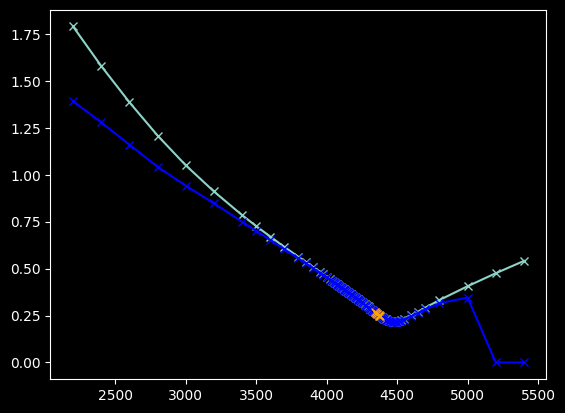

T: 2022-03-11


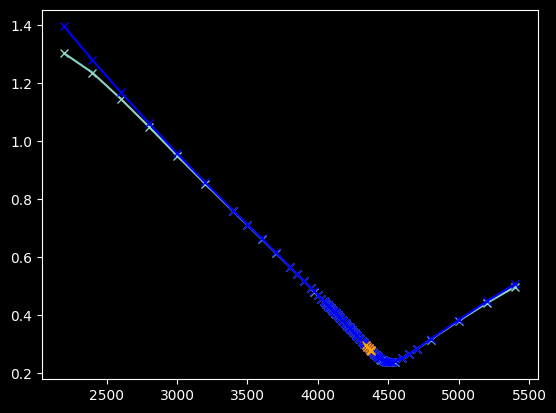

T: 2022-03-18


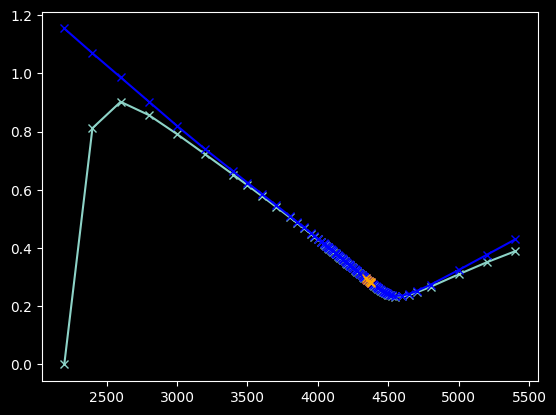

T: 2022-03-23


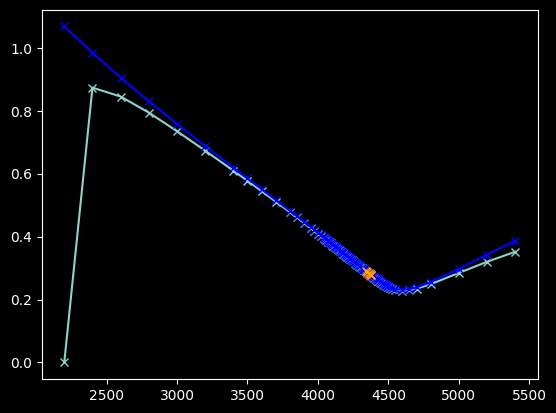

T: 2022-03-25


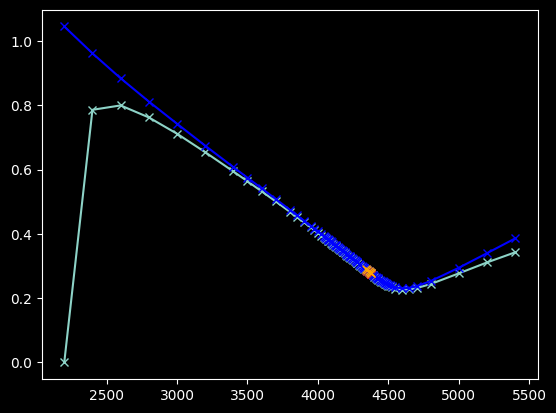

T: 2022-03-30


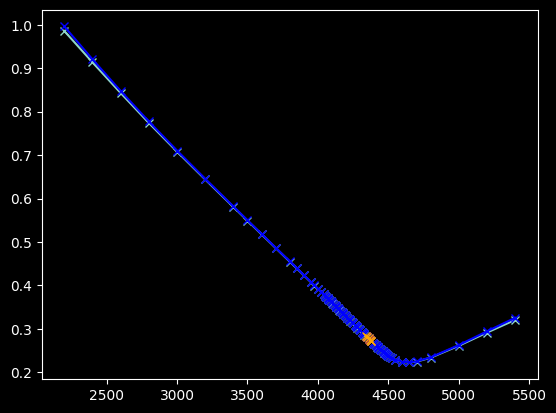

T: 2022-03-31


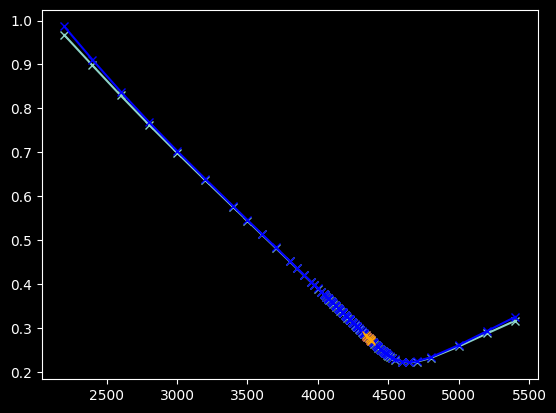

T: 2022-04-01


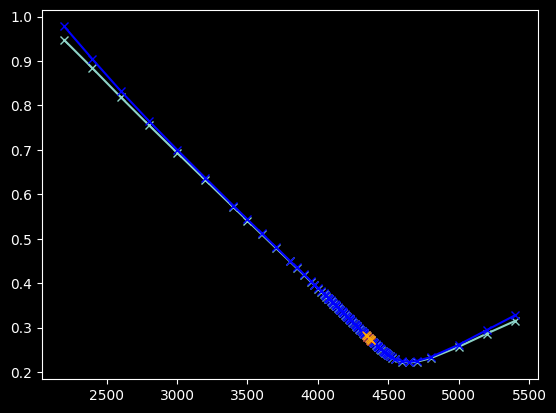

T: 2022-04-08


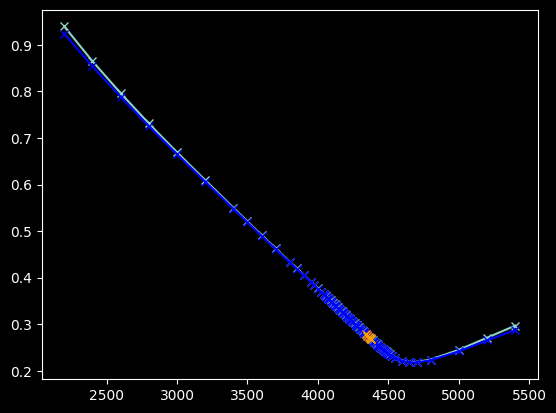

T: 2022-04-14


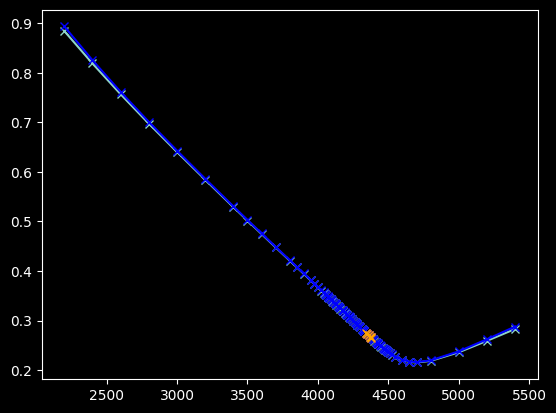

T: 2022-04-22


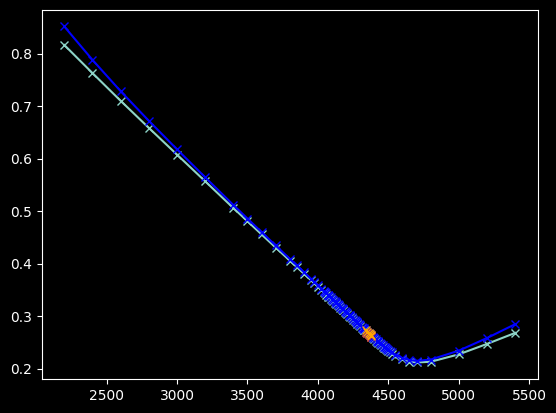

T: 2022-04-29


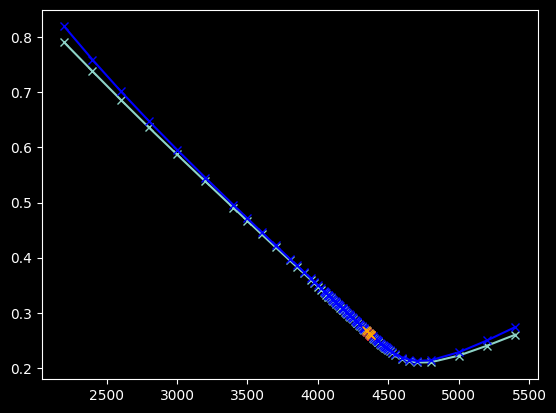

T: 2022-05-20


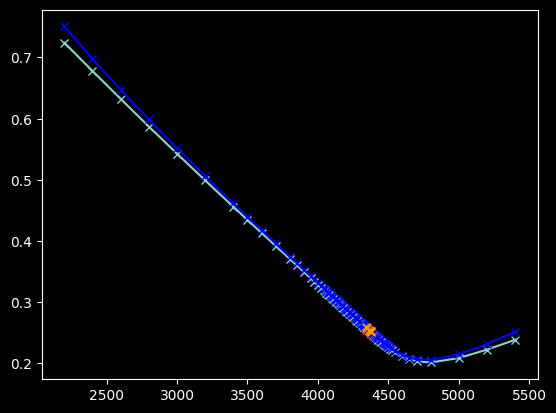

T: 2022-05-31


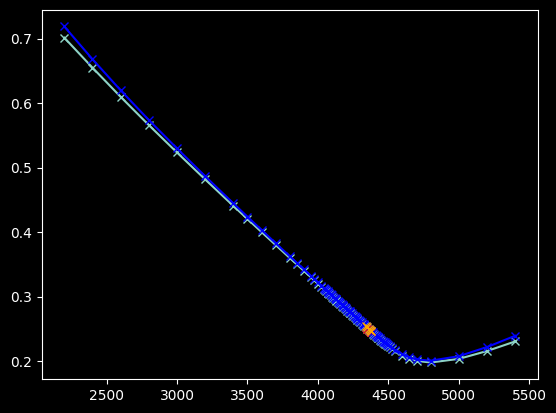

T: 2022-06-17


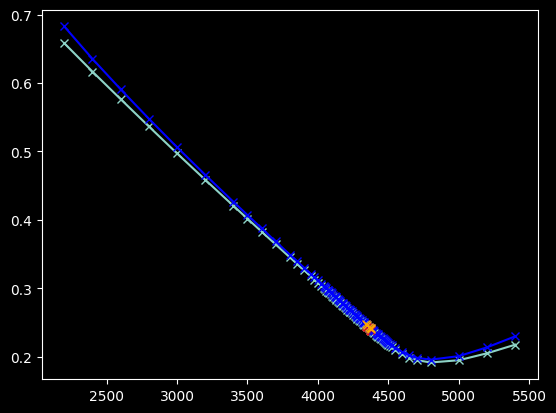

T: 2022-06-30


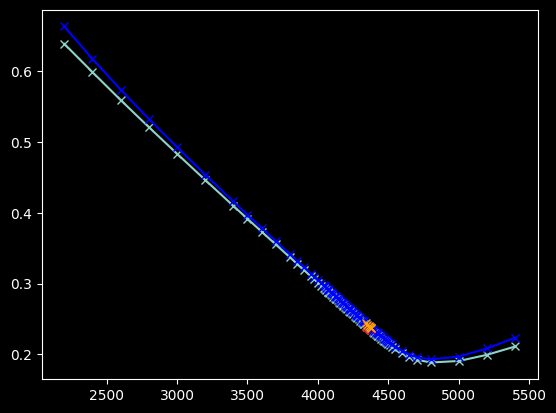

T: 2022-07-15


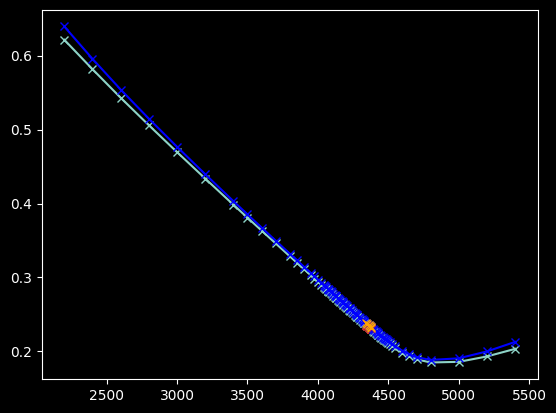

T: 2022-07-29


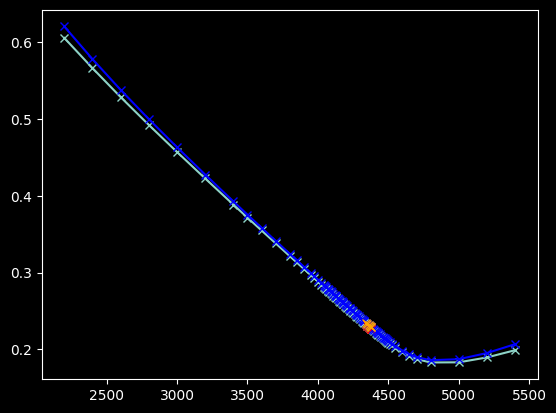

T: 2022-08-31


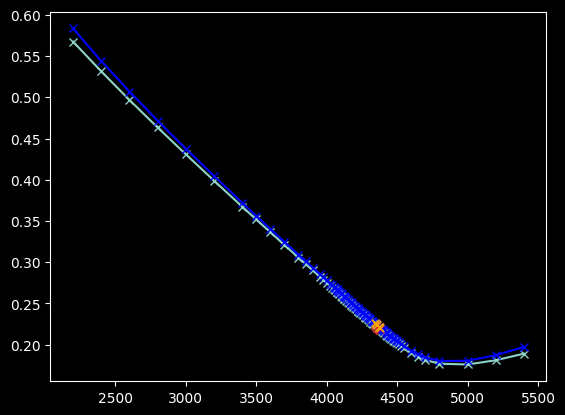

In [9]:
nb.plot_put_call_iv()

T: 2022-03-09


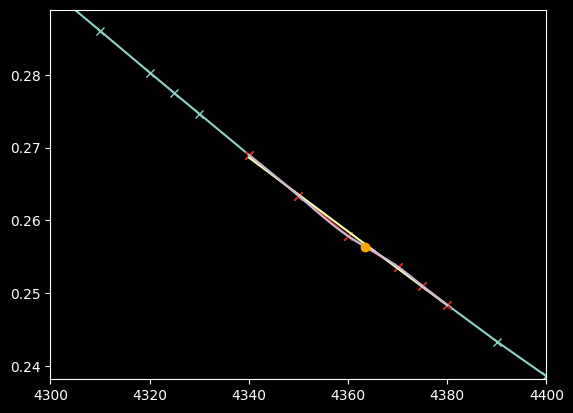

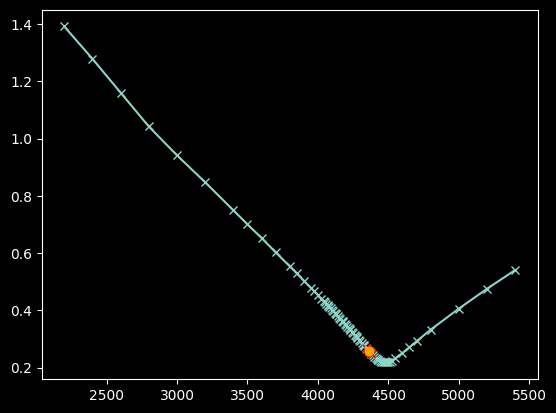

T: 2022-03-11


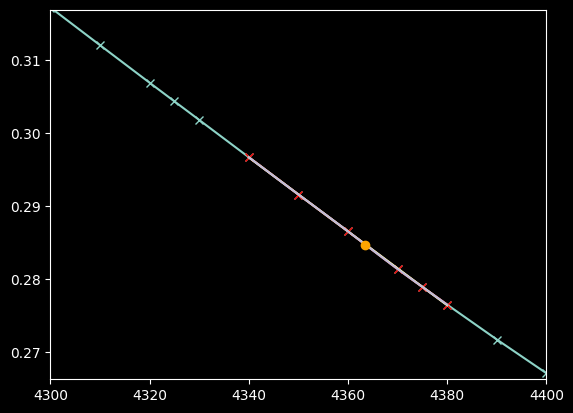

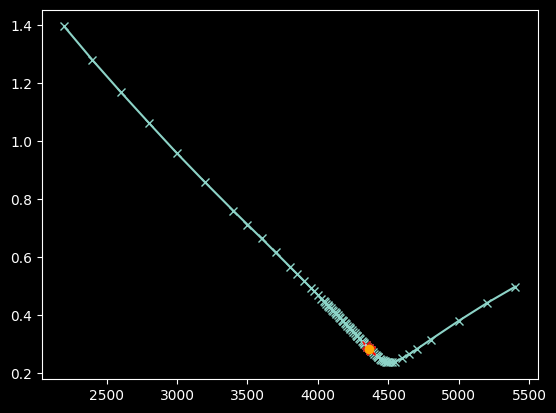

T: 2022-03-18


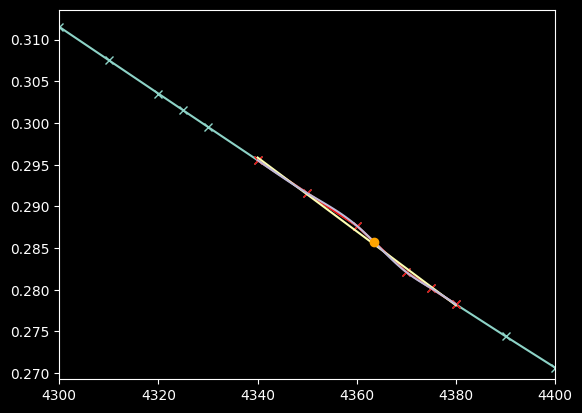

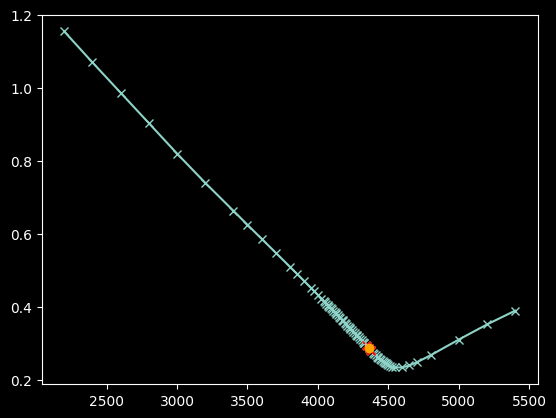

T: 2022-03-23


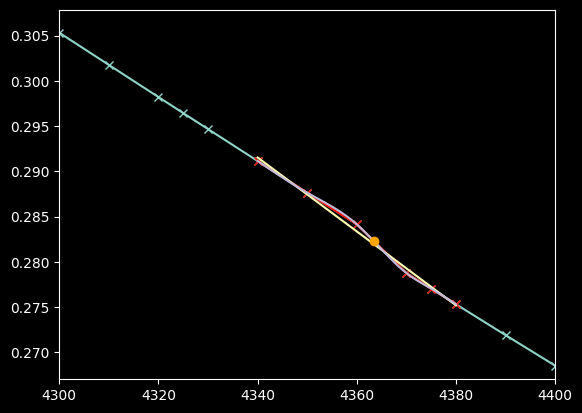

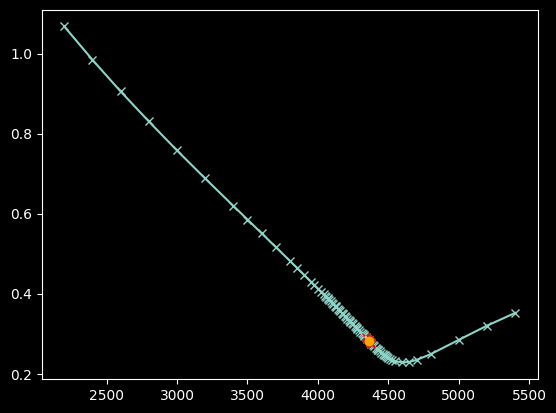

T: 2022-03-25


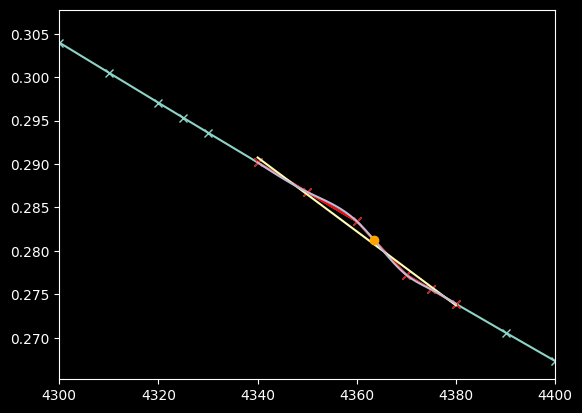

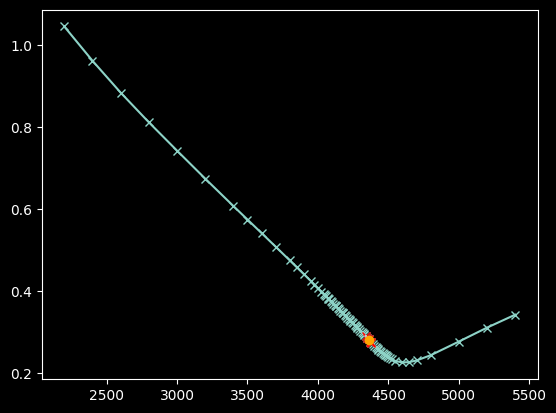

T: 2022-03-30


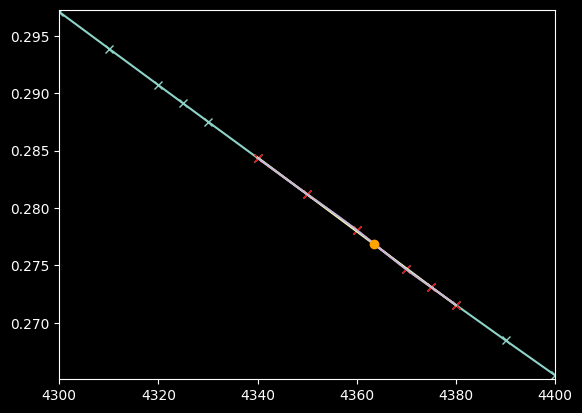

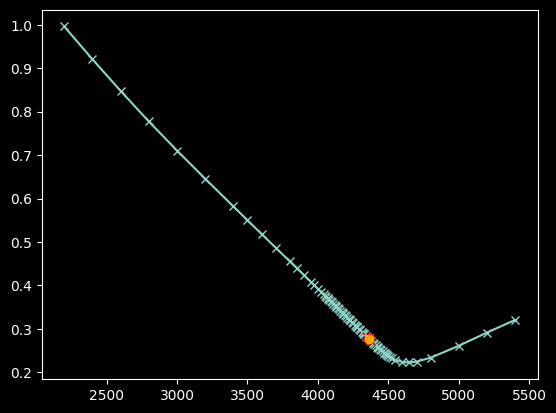

T: 2022-03-31


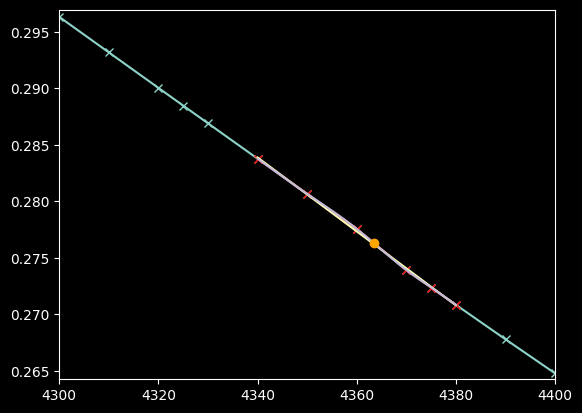

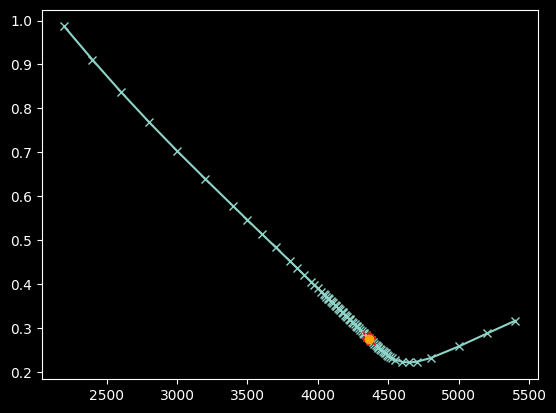

T: 2022-04-01


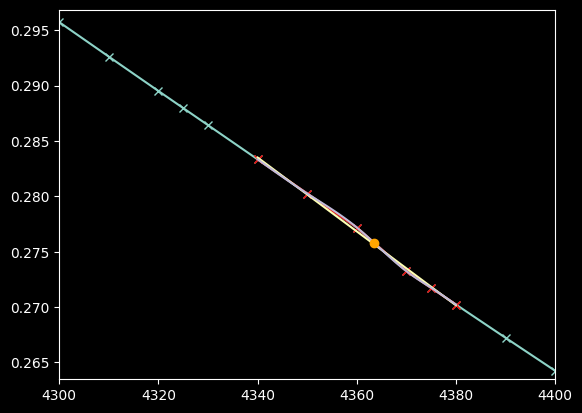

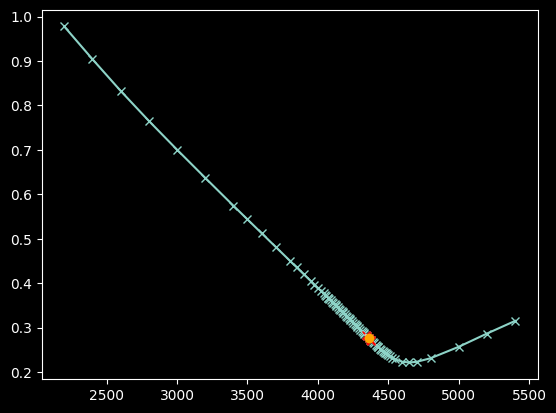

T: 2022-04-08


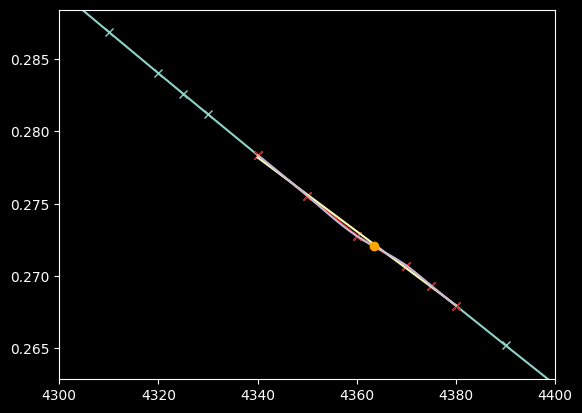

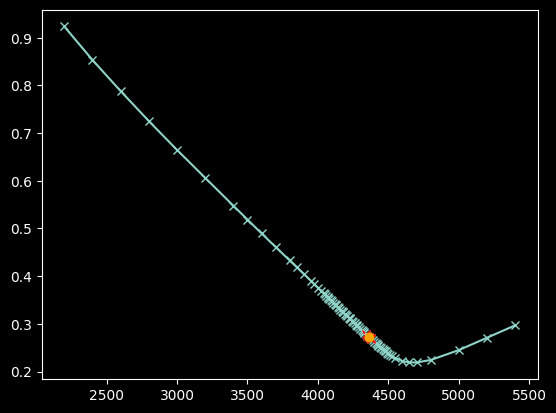

T: 2022-04-14


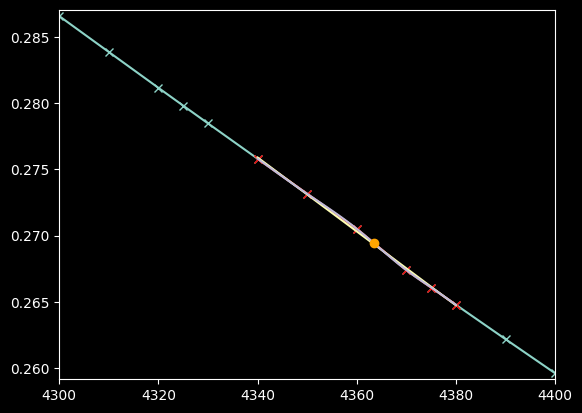

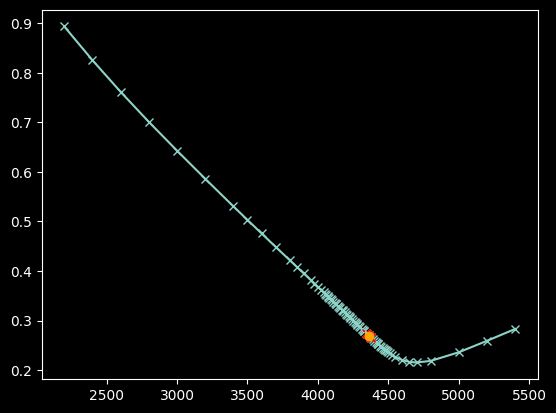

T: 2022-04-22


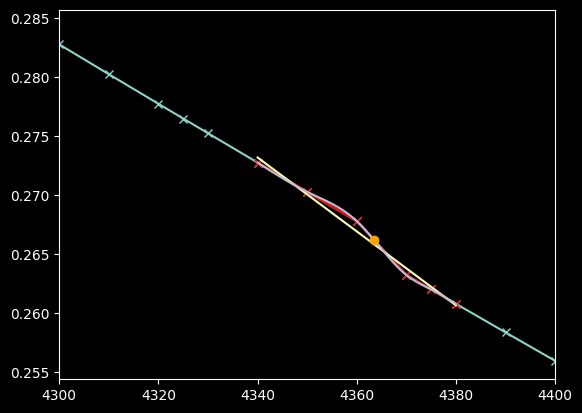

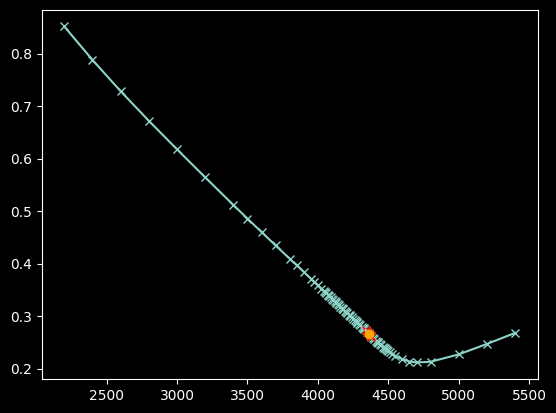

T: 2022-04-29


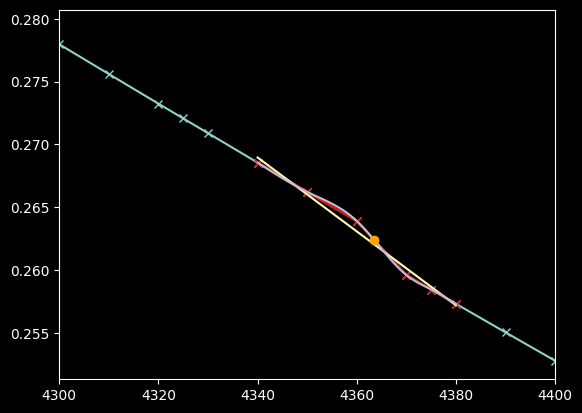

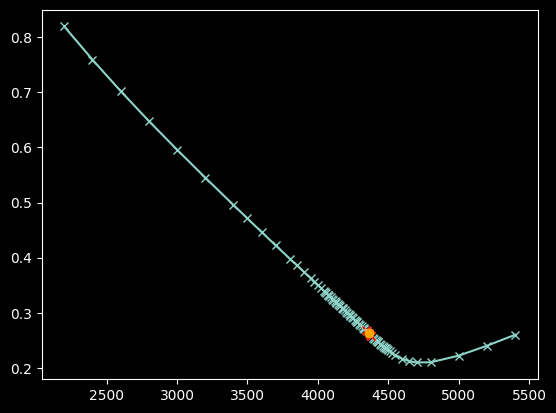

T: 2022-05-20


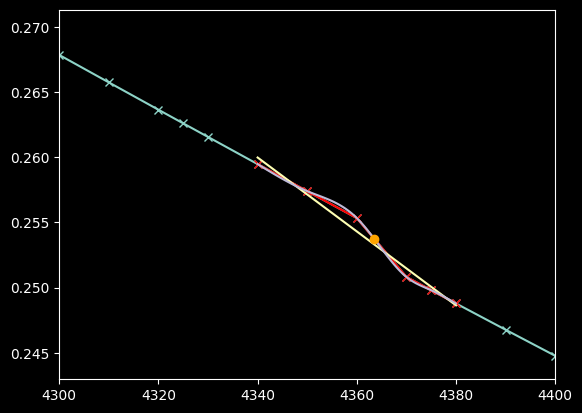

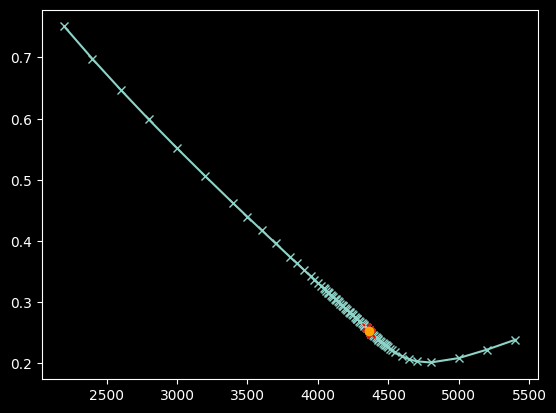

T: 2022-05-31


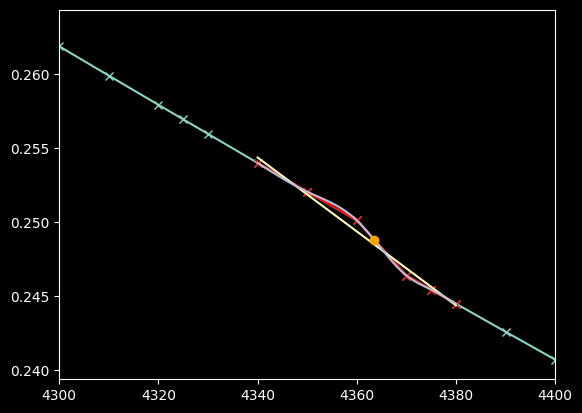

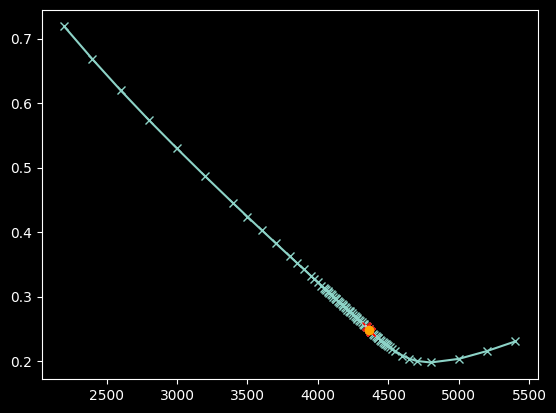

T: 2022-06-17


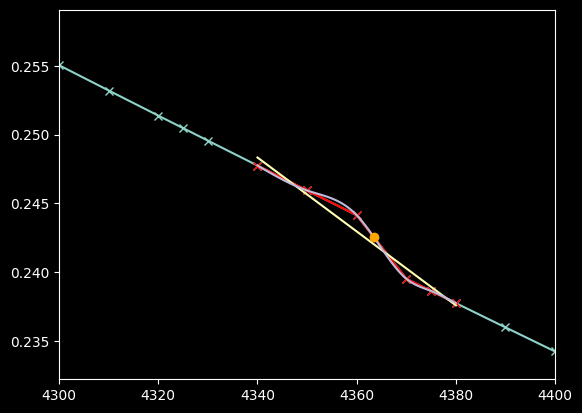

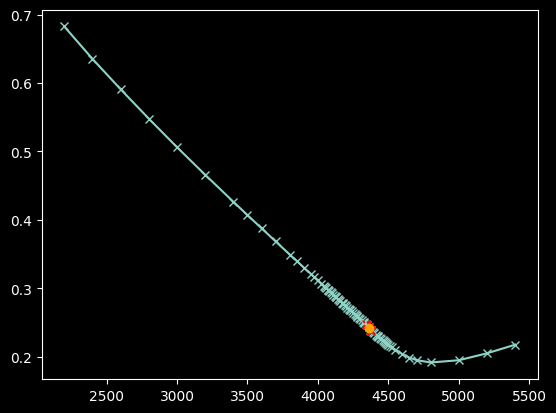

T: 2022-06-30


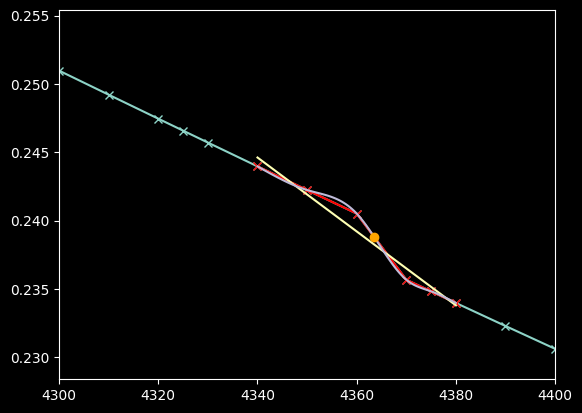

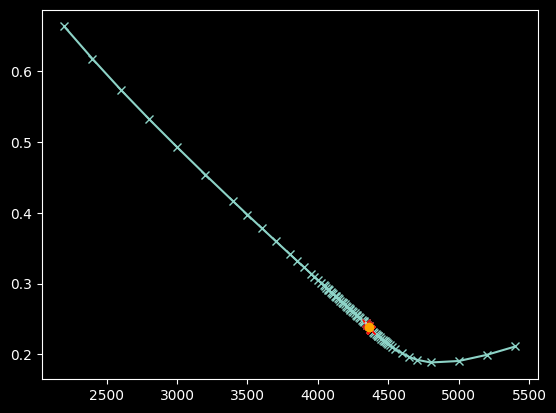

T: 2022-07-15


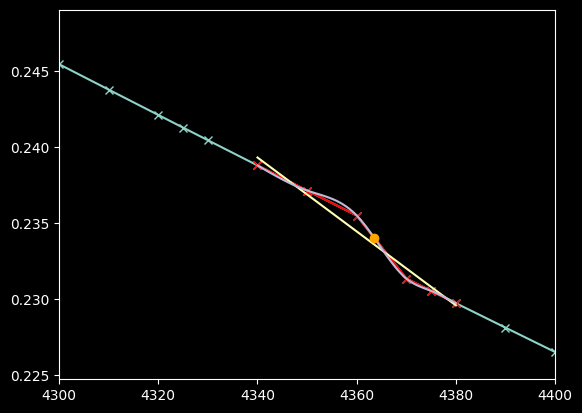

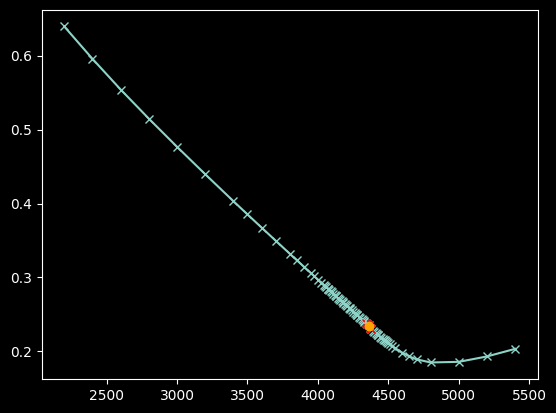

T: 2022-07-29


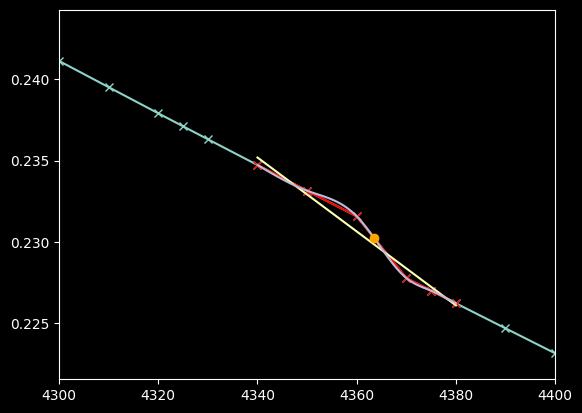

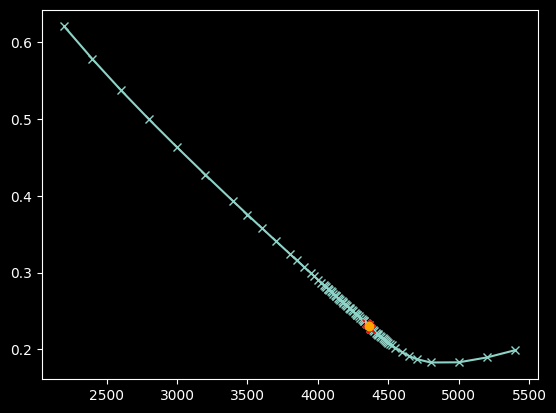

T: 2022-08-31


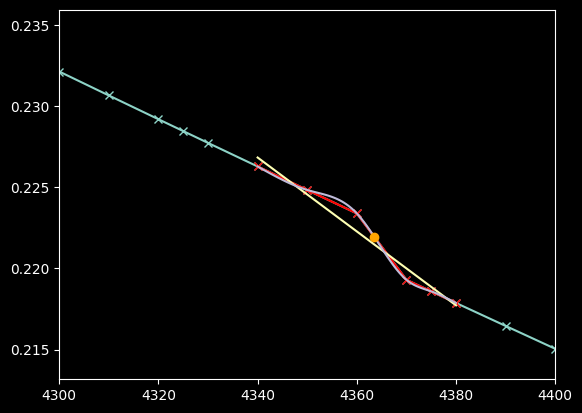

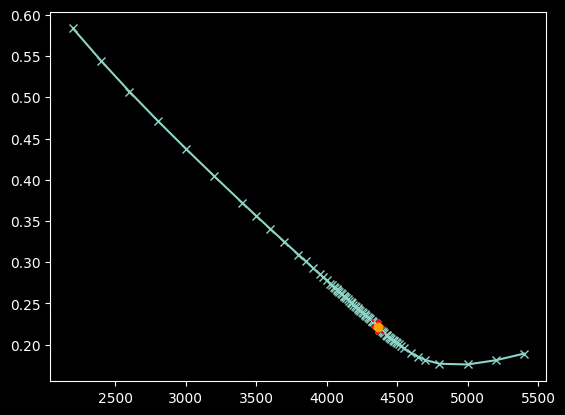

In [10]:
nb.plot_iv(plot_closeup=True)

T: 2022-03-09


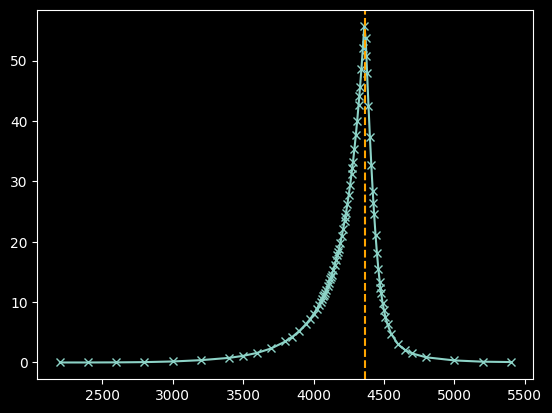

T: 2022-03-11


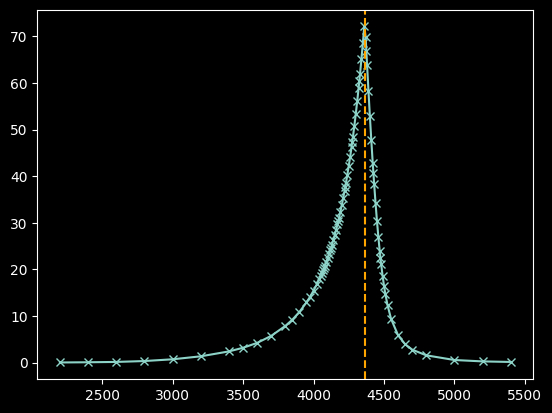

T: 2022-03-18


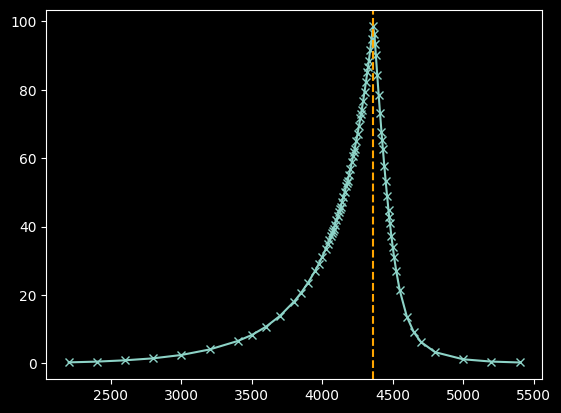

T: 2022-03-23


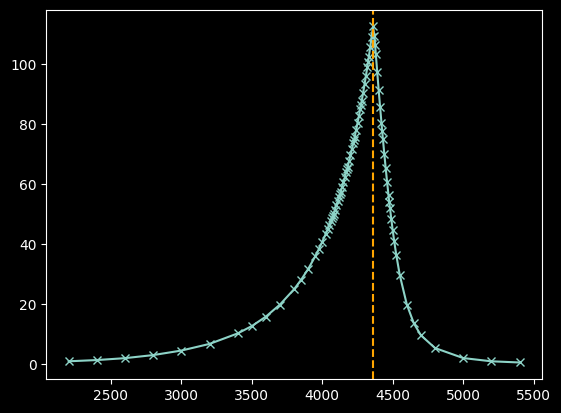

T: 2022-03-25


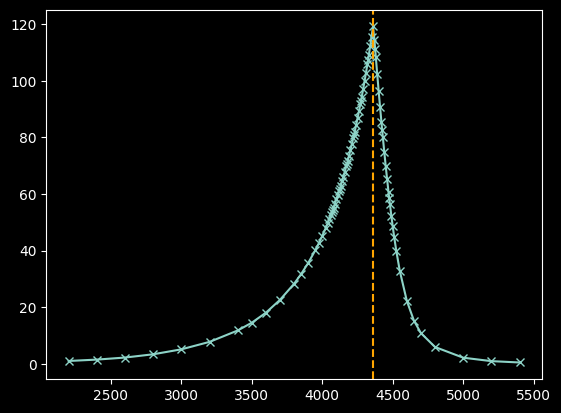

T: 2022-03-30


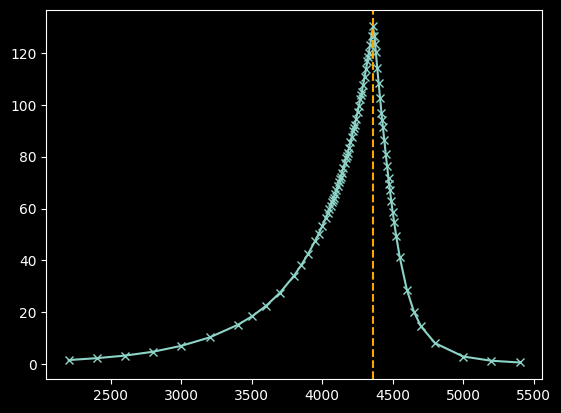

T: 2022-03-31


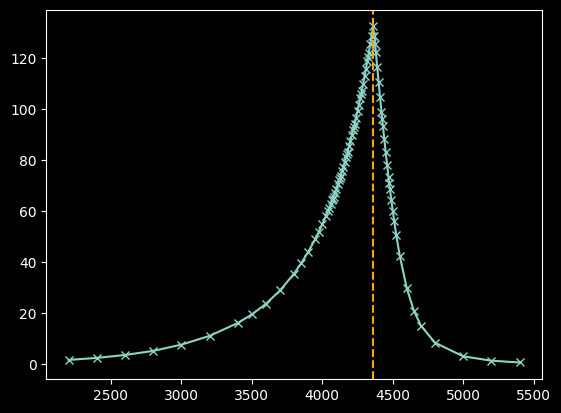

T: 2022-04-01


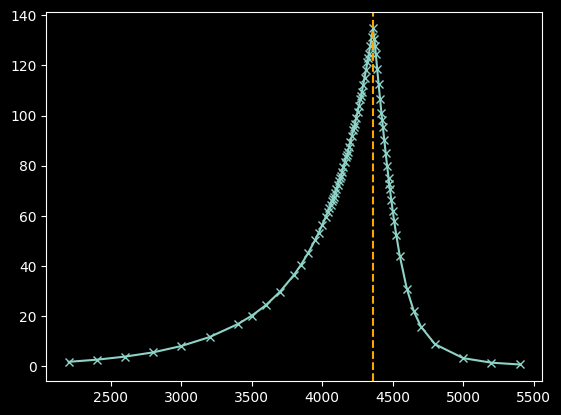

T: 2022-04-08


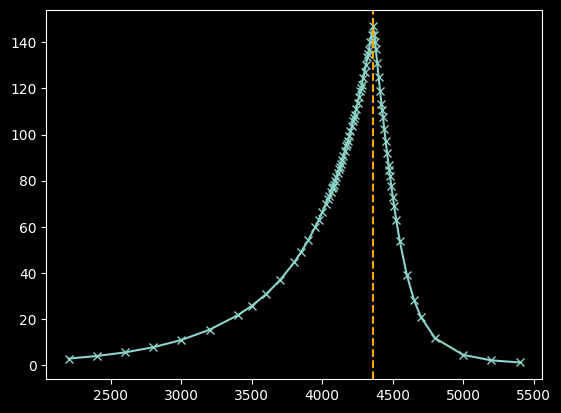

T: 2022-04-14


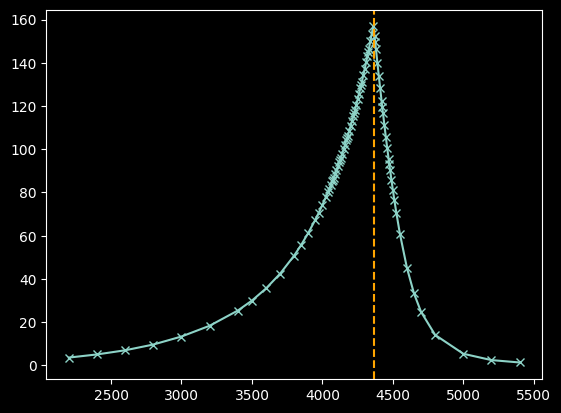

T: 2022-04-22


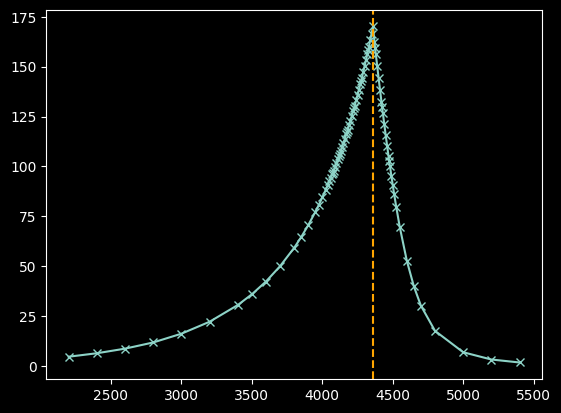

T: 2022-04-29


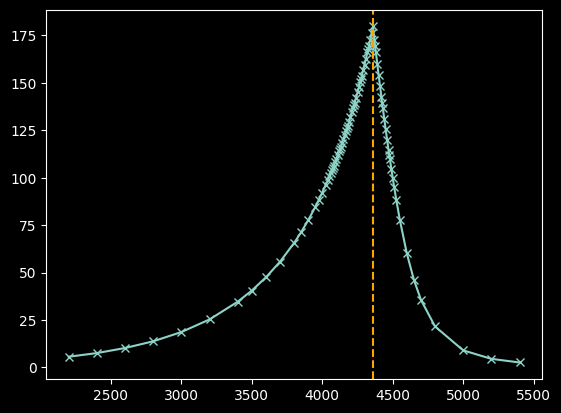

T: 2022-05-20


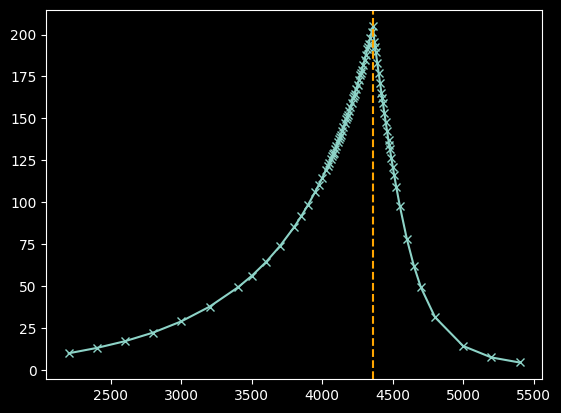

T: 2022-05-31


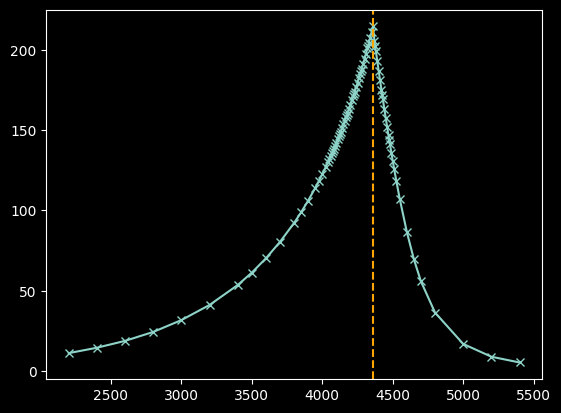

T: 2022-06-17


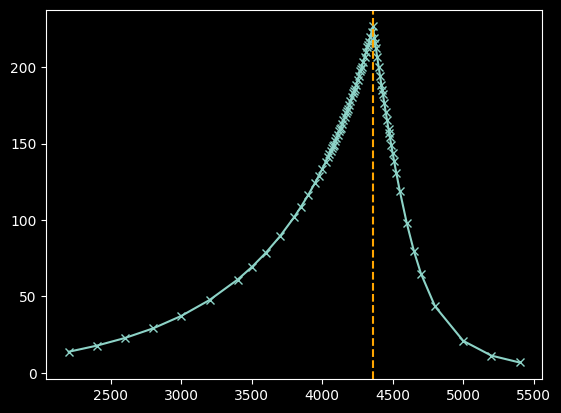

T: 2022-06-30


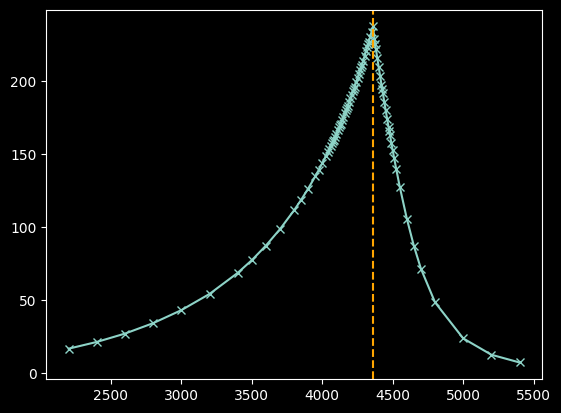

T: 2022-07-15


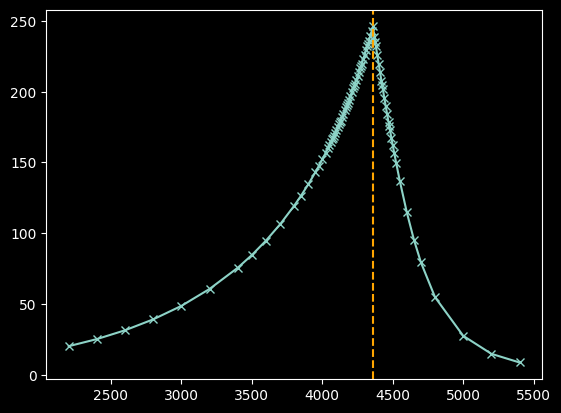

T: 2022-07-29


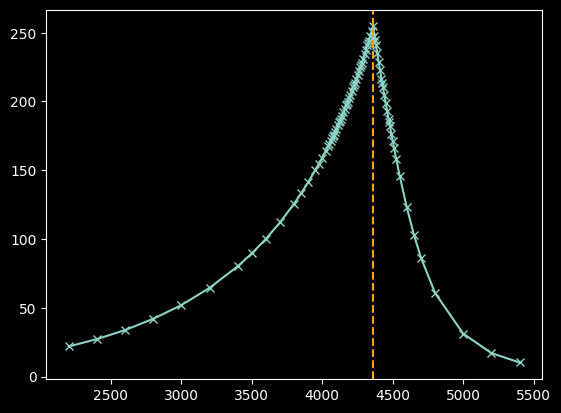

T: 2022-08-31


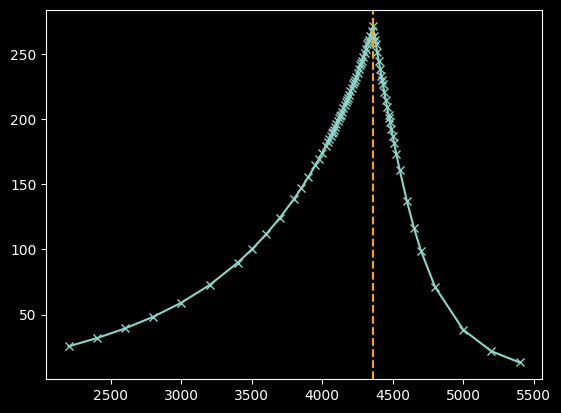

In [11]:
nb.plot_price(plot_closeup=False)

In [11]:
fit = True

if fit:
	parameters = nb.fit(
		skew_weight=0,
		vol_weight=0,
	)
	print(parameters)

2024-08-08 12:02:03.114 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:93 - Minimise cost function iteration with parameters {'hurst_index': 0.93, 'wiener_correlation': -0.9, 'volatility_of_volatility': 1.9}
2024-08-08 12:02:27.845 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:105 - Cost is 0.07486356304235066
2024-08-08 12:02:27.845 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:93 - Minimise cost function iteration with parameters {'hurst_index': 0.9300000100000001, 'wiener_correlation': -0.9, 'volatility_of_volatility': 1.9}
2024-08-08 12:02:28.954 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:105 - Cost is 0.07486356541157922
2024-08-08 12:02:28.954 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:93 - Minimise cost function iteration with parameters {'hurst_index': 0.93, 'wiener_correlatio

```python
{
	'hurst_index': 0.778517007065415,
	'wiener_correlation': -0.9193795156073621,
	'volatility_of_volatility': 3.1856091243775864
}
```

In [12]:
nb.plot_paths()